In [1]:
import pandas as pd

# Commuting Zones in Lebanon

Commuting zones represent the areas where people spend most of their time and conduct most of their economic activity. These areas of economic integration are independent from political boundaries and can illustrate how economic communities and commute patterns transcend regional boundaries.

## Data

### Features of Commuting Zones maps
Updated several times a year using dynamic data from aggregated Facebook user home and work locations, and thus not limited by new census data results
Built using a standard approach/methodology for the entire globe
Contains metrics calculated to yield basic demographic, infrastructure and economic measures for each commuting zone
Created using well-researched graph-theory methods such as Louvain algorithm clustering and Voronoi shapes
Available as full polygon shapefiles so that they can be used for a wide range of geospatial analyses
Agnostic of traditional administrative boundaries (except for sensitive countries, which are removed manually)

**Population sample**: Commuting Zones draws from a sample of people who use the Facebook mobile app and have enabled the Location Services setting. More info on Location Services on Facebook can be found here.

**Spatial methods**: The Commuting Zones spatial shapes are built by defining a community network. We start with a node for each city or town where people who use Facebook live. We define the edges of the graph using this formula:

(#residents moving from i to j + #residents moving from j to i) / (#residents in i + #residents in j)

We then reduce the complexity of this graph using a Louvain clustering algorithm. Once we have a simplified network/graph, we use Voronoi shapes to define the polygon for the commuting zone. Here is a more detailed walk-through of how commuting zones are generated.

**Temporal span**: Commuting zones are rebuilt at most every 3 months, when the commuting zone shapes are generated using the previous few weeks of Location Services data.

**Minimum counts/size**: To generate a commuting zone, there must be at least 50 people estimated to live within its boundary and a minimum size of at least 1 kilometer by 1 kilometer.

### Descriptions of columns

- **Estimated population (win_population)**: Estimated population within the zone (calculated from the publicly available Facebook High-Resolution Population Density Maps or WorldPop estimates). These population estimates are provided as counts per grid tile on the earth’s surface. We map each of these tiles to a commuting zone, then aggregate population by taking the sum of all the tiles within the commuting zone polygon defined in the geometry field. We then winsorizethe bottom and top 5% of commuting zones. This means that the population counts per commuting zone below the 5% percentile are replaced by the 5% percentile value, and those above the 95% percentile are replaced by the 95% percentile value. All commuting zones have a population of at least 50.

- **Estimated road length (win_roads_km)**: Estimated length of roads within the zone in kilometers (calculated from the publicly available OpenStreetMap and roads we've detected that are missing from it). We calculate this value by taking the sum of the length of all roads within the commuting zone polygon defined in the geometry field. We then winsorize the bottom and top 5% of commuting zones. This means that the road length counts per commuting zone below the 5% percentile are replaced by the 5% percentile value, and those above the 95% percentile are replaced by the 95% percentile value.

- **Area (area)**: Area of commuting zone in square kilometers. All commuting zones are at least 1 kilometer by 1 kilometer.

- **Restaurant/Bar count (restaurant_bar_count)**: A scaled score of 1-1,000 calculated by counting all the Facebook Pages of this type within each commuting zone globally. We then winsorize those values. This means that the Page counts per commuting zone below the 2.5% percentile are replaced by the 2.5% percentile value, and those above the 97.5% percentile are replaced by the 97.5% percentile value. The winsorized count of Pages in each commuting zone is then scaled between 0 and 1,000. That means that the smallest winsorized value is given a score of 0 and the highest is given a score of 1,000, with all intermediate values assigned linearly.

- **Library count (library_count)**: A scaled score of 1-1,000 calculated by counting all the Facebook Pages of this type within each commuting zone globally. We then winsorize those values. This means that the Page counts per commuting zone below the 2.5% percentile are replaced by the 2.5% percentile value, and those above the 97.5% percentile are replaced by the 97.5% percentile value. The winsorized count of Pages in each commuting zone is then scaled between 0 and 1,000. That means that the smallest winsorized value is given a score of 0 and the highest is given a score of 1,000, with all intermediate values assigned linearly.

- **Grocery/Food count (grocery_food_count)**: A scaled score of 1-1,000 calculated by counting all the Facebook Pages of this type within each commuting zone globally. We then winsorize those values. This means that the Page counts per commuting zone below the 2.5% percentile are replaced by the 2.5% percentile value, and those above the 97.5% percentile are replaced by the 97.5% percentile value. The winsorized count of Pages in each commuting zone is then scaled between 0 and 1,000. That means that the smallest winsorized value is given a score of 0 and the highest is given a score of 1,000, with all intermediate values assigned linearly.

- **Education count (education_count)**: A scaled score of 1-1,000 calculated by counting all the Facebook Pages of this type within each commuting zone globally. We then winsorize those values. This means that the Page counts per commuting zone below the 2.5% percentile are replaced by the 2.5% percentile value, and those above the 97.5% percentile are replaced by the 97.5% percentile value. The winsorized count of Pages in each commuting zone is then scaled between 0 and 1,000. That means that the smallest winsorized value is given a score of 0 and the highest is given a score of 1,000, with all intermediate values assigned linearly.

- **Local business count (local_business_locations_count)**: A scaled score of 1-1,000 calculated by counting all the Facebook Pages of this type within each commuting zone globally. We then winsorize those values. This means that the Page counts per commuting zone below the 2.5% percentile are replaced by the 2.5% percentile value, and those above the 97.5% percentile are replaced by the 97.5% percentile value. The winsorized count of Pages in each commuting zone is then scaled between 0 and 1,000. That means that the smallest winsorized value is given a score of 0 and the highest is given a score of 1,000, with all intermediate values assigned linearly.

- **Parks count (parks_count)**: A scaled score of 1-1,000 calculated by counting all the Facebook Pages of this type within each commuting zone globally. We then winsorize those values. This means that the Page counts per commuting zone below the 2.5% percentile are replaced by the 2.5% percentile value, and those above the 97.5% percentile are replaced by the 97.5% percentile value. The winsorized count of Pages in each commuting zone is then scaled between 0 and 1,000. That means that the smallest winsorized value is given a score of 0 and the highest is given a score of 1,000, with all intermediate values assigned linearly.

- **Health services count (health_services_count)**: A scaled score of 1-1,000 calculated by counting all the Facebook Pages of this type within each commuting zone globally. We then winsorize those values. This means that the Page counts per commuting zone below the 2.5% percentile are replaced by the 2.5% percentile value, and those above the 97.5% percentile are replaced by the 97.5% percentile value. The winsorized count of Pages in each commuting zone is then scaled between 0 and 1,000. That means that the smallest winsorized value is given a score of 0 and the highest is given a score of 1,000, with all intermediate values assigned linearly.

In [38]:
# movement_range = pd.read_csv('../../data/movement/1922039342088483_2023-08-01_2023-08-21_csv/1922039342088483_2023-08-01.csv')
import glob

all_files = glob.glob(
    "../../data/comuting_zones/536501471557971_2020-10-04_2023-03-06_csv/*.csv"
)

commuting_zones = pd.DataFrame()

for file in all_files:
    df = pd.read_csv(file)
    df = df[df["country"] == "Lebanon"]
    df.rename(columns={"GEOMETRY": "clean_geometry"}, inplace=True)

    commuting_zones = pd.concat([commuting_zones, df])

C:\Users\sahit\AppData\Local\Temp\ipykernel_29724\3581987034.py:8: DtypeWarning: Columns (3,5,6,7,8,9,10,11,12,13,14,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,2

In [39]:
commuting_zones = commuting_zones.iloc[:, :20]
commuting_zones = commuting_zones[commuting_zones["name"] != "damascus"]
commuting_zones = commuting_zones.dropna(subset="clean_geometry")

In [75]:
from shapely import wkt
from shapely.errors import WKTReadingError


def load_geometry(x):
    try:
        formatted_x = re.sub(
            r"(\d+\.?\d*) (\d+\.?\d*)  (\d+\.?\d*) (\d+\.?\d*)", r"\1 \2, \3 \4", x
        )
        corrected = re.sub(r"\)\)  \(\(", ")), ((", formatted_x)
        corrected = re.sub(r"\)\)\)  \(\(\(", "))), (((", corrected)
        # corrected = re.sub(r'(?<![()])\s+(?![()])', ',', corrected)
        # corrected= re.sub(r'(\d+),(\d+)', r'\1 \2', corrected)
        print(corrected)
        # corrected = ensure_closed_polygon(corrected)
        return wkt.loads(corrected)
    except WKTReadingError as e:
        print(f"Error parsing geometry: {corrected}\nError message: {e}")
        return None  # or another value to represent the error


commuting_zones["clean_geometry_new"] = commuting_zones["clean_geometry"].apply(
    lambda x: load_geometry(x)
)

MULTIPOLYGON (((35.38999299353935 33.172951869109916, 35.434604293478415 33.18988180634116  35.435999239234484 33.22083136631164, 35.413389 33.211984  35.399516 33.217476, 35.383967 33.195442  35.365864 33.19477, 35.38999299353935 33.172951869109916)), ((35.25519557741156 33.386270336266506, 35.322714 33.400053  35.28271083549533 33.45305720544115, 35.2562431 33.3951977  35.25519557741156 33.386270336266506)))
Error parsing geometry: MULTIPOLYGON (((35.38999299353935 33.172951869109916, 35.434604293478415 33.18988180634116  35.435999239234484 33.22083136631164, 35.413389 33.211984  35.399516 33.217476, 35.383967 33.195442  35.365864 33.19477, 35.38999299353935 33.172951869109916)), ((35.25519557741156 33.386270336266506, 35.322714 33.400053  35.28271083549533 33.45305720544115, 35.2562431 33.3951977  35.25519557741156 33.386270336266506)))
Error message: IllegalArgumentException: Points of LinearRing do not form a closed linestring
MULTIPOLYGON (((35.424837 33.578229, 35.455202 33.5956

C:\Users\sahit\AppData\Local\Temp\ipykernel_29724\224510672.py:2: DeprecationWarning: WKTReadingError is deprecated and will be removed in a future version. Use ShapelyError instead (functions previously raising {name} will now raise a ShapelyError instead).
  from shapely.errors import WKTReadingError


In [87]:
import matplotlib.pyplot as plt

# commuting_zones.dropna(subset='clean_geometry_new', inplace=True)
# commuting_zones['clean_geometry_new'] = commuting_zones['clean_geometry_new'].apply(lambda x: dumps(x))

# commuting_zones = gpd.GeoDataFrame(commuting_zones, crs="EPSG:4326",geometry = commuting_zones['clean_geometry_new'])

# commuting_zones = commuting_zones[commuting_zones.clean_geometry_new.centroid.x <= 37]

In [77]:
commuting_zones[
    [
        "win_population",
        "win_roads_km",
        "area",
        "restaurant_bar_count",
        "library_count",
        "grocery_food_count",
        "education_count",
        "local_business_locations_count",
        "parks_count",
        "health_services_count",
    ]
] = commuting_zones[
    [
        "win_population",
        "win_roads_km",
        "area",
        "restaurant_bar_count",
        "library_count",
        "grocery_food_count",
        "education_count",
        "local_business_locations_count",
        "parks_count",
        "health_services_count",
    ]
].astype(int)

In [78]:
commuting_zones["cz_gen_ds"] = commuting_zones["cz_gen_ds"].apply(
    lambda x: pd.to_datetime(x)
)
commuting_zones = commuting_zones[~(commuting_zones["fbcz_id"] == "Asia295")]

Text(0.5, 0.98, 'Estimated population counts')

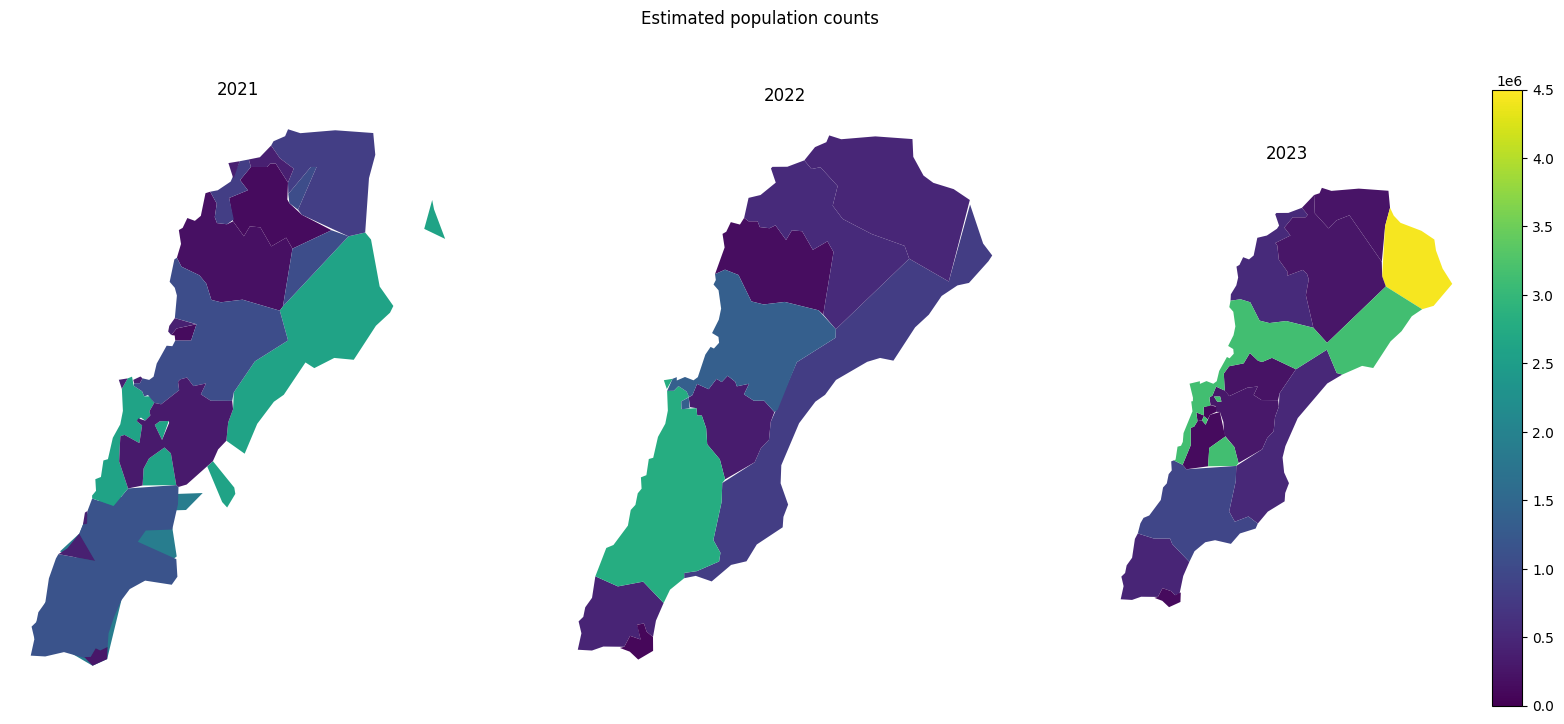

In [140]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
ax = axs.flatten()

for id, year in enumerate([2021, 2022, 2023]):
    if id != 2:
        legend_bool = False
    else:
        legend_bool = 2
    commuting_zones[commuting_zones["cz_gen_ds"].dt.year == year].plot(
        column="win_population", ax=ax[id], vmin=0, vmax=4500000, legend=legend_bool
    )
    ax[id].set_title(year)
    ax[id].spines["top"].set_visible(False)
    ax[id].spines["bottom"].set_visible(False)
    ax[id].spines["right"].set_visible(False)
    ax[id].spines["left"].set_visible(False)

    ax[id].set_xticks([])
    ax[id].set_yticks([])

plt.axis("off")
plt.suptitle("Estimated population counts")

In [126]:
commuting_zones[["cz_gen_ds", "win_population"]].groupby("cz_gen_ds").sum()

,win_population
cz_gen_ds,
2020-04-10,67239
2021-03-01,1881941
2021-04-07,6925978
2022-08-07,6970833
2023-03-05,11366693


Text(0.5, 0.98, 'Estimated road length in km')

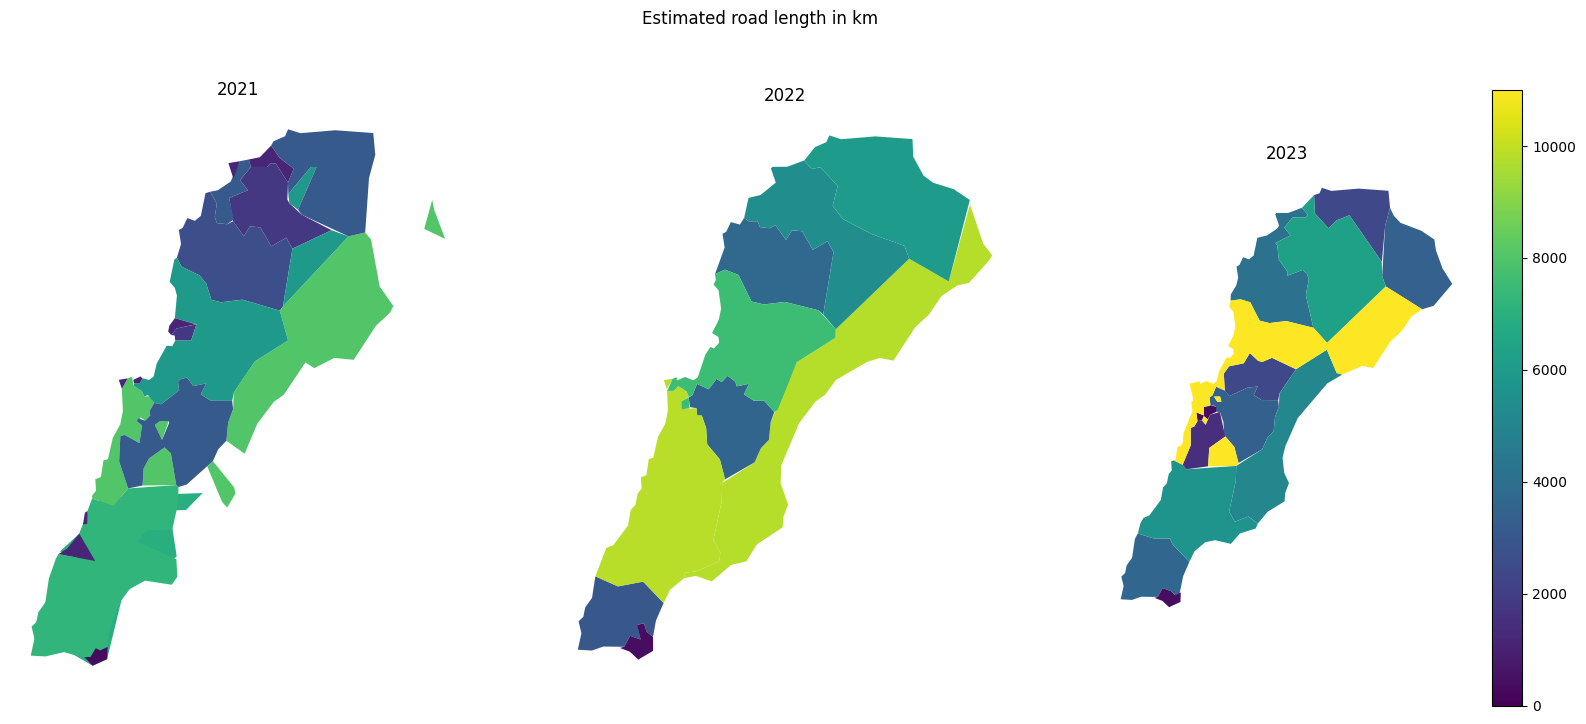

In [141]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
ax = axs.flatten()

for id, year in enumerate([2021, 2022, 2023]):
    if id != 2:
        legend_bool = False
    else:
        legend_bool = 2
    commuting_zones[commuting_zones["cz_gen_ds"].dt.year == year].plot(
        column="win_roads_km", ax=ax[id], vmin=0, vmax=11000, legend=legend_bool
    )
    ax[id].set_title(year)
    ax[id].spines["top"].set_visible(False)
    ax[id].spines["bottom"].set_visible(False)
    ax[id].spines["right"].set_visible(False)
    ax[id].spines["left"].set_visible(False)

    ax[id].set_xticks([])
    ax[id].set_yticks([])

plt.axis("off")
plt.suptitle("Estimated road length in km")

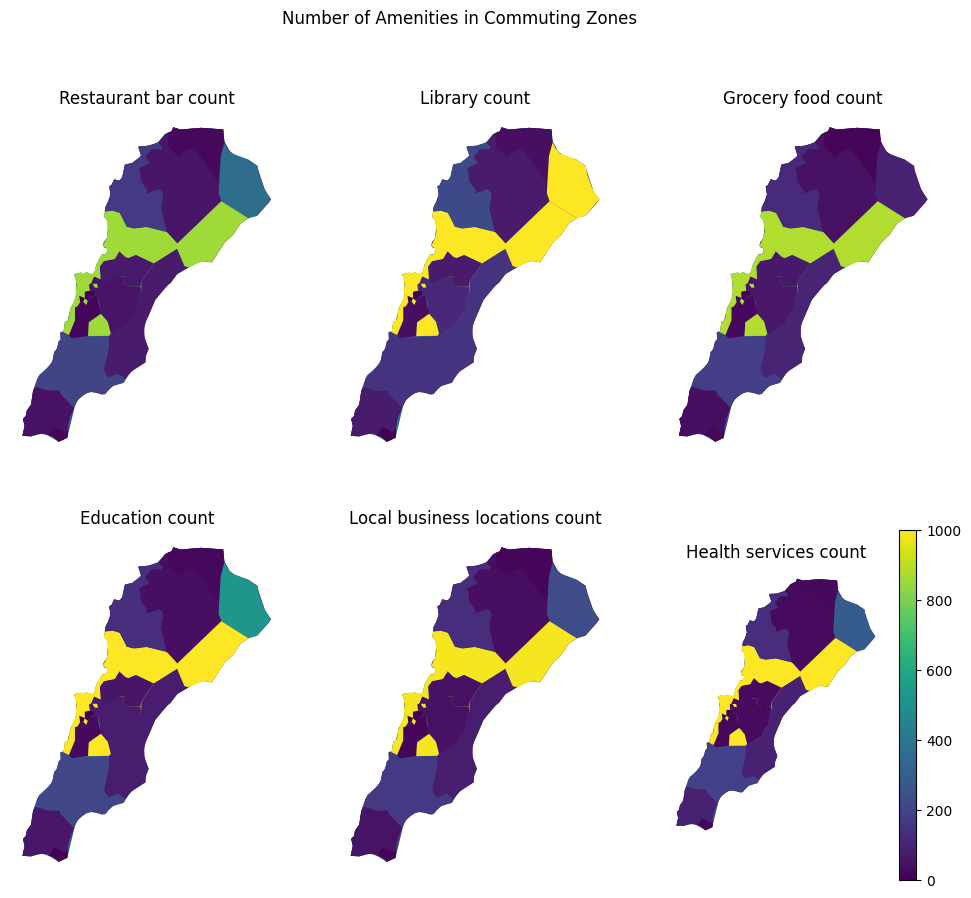

In [144]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
ax = axs.flatten()

plt.axis("off")

for idx, type in enumerate(
    [
        "restaurant_bar_count",
        "library_count",
        "grocery_food_count",
        "education_count",
        "local_business_locations_count",
        "health_services_count",
    ]
):
    if idx == 5:
        legend_bool = True
    else:
        legend_bool = False
    commuting_zones.plot(column=type, ax=ax[idx], vmin=0, vmax=1000, legend=legend_bool)
    ax[idx].set_title(type.replace("_", " ").capitalize())
    ax[idx].axis("off")

    plt.suptitle("Number of Amenities in Commuting Zones")

## Observations 

* The area close to the Syrian border appears to have a lot of economic activity and population